# Requirements
- Classificação de Imagens com TensorFlow & Keras

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST

# Como os dados são representados?

In [27]:
# x_train e y_train são tensores NumPy (ou arrays multidimensionais ou numpy.ndarray), onde cada imagem é uma matriz 2D de 28x28 números (valores de pixels), e cada rótulo (y_train, y_test) 
# Cada imagem em x_train mostra um número escrito à mão (por exemplo, um “3”).
# O valor correspondente em y_train é o número inteiro que indica qual dígito a imagem representa.
# os dados estão representados como 
# é um número inteiro entre 0 e 9 que indica o dígito representado na imagem.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



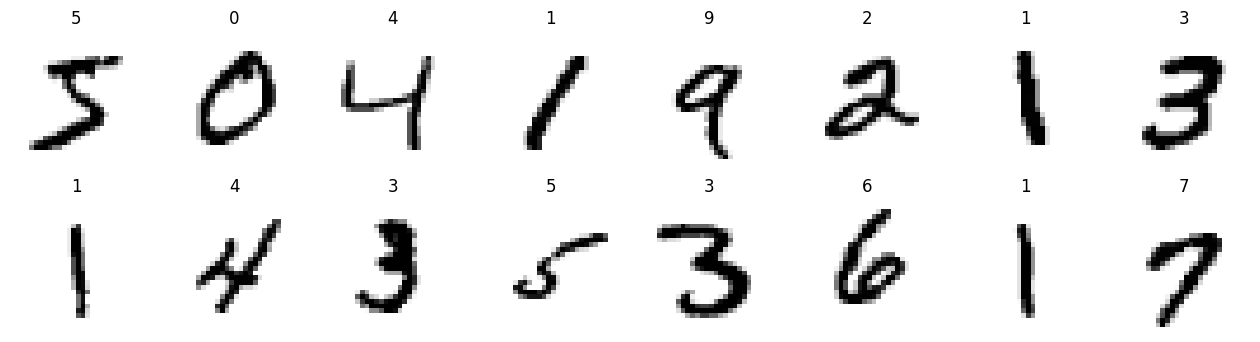

In [28]:
linhas  = 2
colunas = 8

fig, axs = plt.subplots(linhas, colunas, figsize=(16, 4))
axs      = axs.flatten()

for i in range(linhas * colunas):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].set_title(str(y_train[i]))
    axs[i].axis('off')

plt.show()

# Features

In [29]:
# As features (características) são os próprios pixels das imagens, ou seja, os valores numéricos dentro de x_train e x_test.
# Cada imagem do MNIST tem 28 × 28 = 784 pixels.
# Cada pixel contém um valor de intensidade (de 0 a 255), que é a informação usada pelo modelo para aprender.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Training

In [30]:
# No mnist o problema é de classificação
modelo_1 = tf.keras.models.Sequential()
modelo_1.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
modelo_1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [31]:
modelo_1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
# O split inicial (train/test) vem pronto do MNIST.
# O split de validação não é feito manualmente — o código apenas reutiliza o conjunto de teste como validação.
# O modelo usa validation_data=(x_test, y_test) durante o treinamento, mas normalmente, em projetos reais, você criaria uma divisão adicional (train/validation/test). Lidar com imbalanços aqui.
history_m1 = modelo_1.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64)

Epoch 1/10
136/938 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.2932 - loss: 2.1067  

/Users/daniel-higa/development/github/mo839/lab02/mo839/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.7717 - loss: 0.9987 - val_accuracy: 0.8634 - val_loss: 0.6042
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8644 - loss: 0.5565 - val_accuracy: 0.8807 - val_loss: 0.4786
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8782 - loss: 0.4754 - val_accuracy: 0.8906 - val_loss: 0.4278
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.8853 - loss: 0.4358 - val_accuracy: 0.8957 - val_loss: 0.3992
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8900 - loss: 0.4113 - val_accuracy: 0.9003 - val_loss: 0.3805
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8934 - loss: 0.3942 - val_accuracy: 0.9046 - val_loss: 0.3669
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8964 - loss: 0.3813 - val_accuracy: 0.9058 - val_loss: 0.3563
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.8987 - loss: 0.3711 - val_accurac

In [33]:
def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Acurácia Treinamento', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Acurácia Validação', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Loss Treinamento', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Loss Validação', marker='o', color='red', linestyle='--')

  for _ in range(2):
      ax[_].set_xlabel('Época')
      ax[_].set_ylabel('Acurácia' if _ == 0 else 'Loss')
      ax[_].legend()
      ax[_].grid(True, linestyle=':')

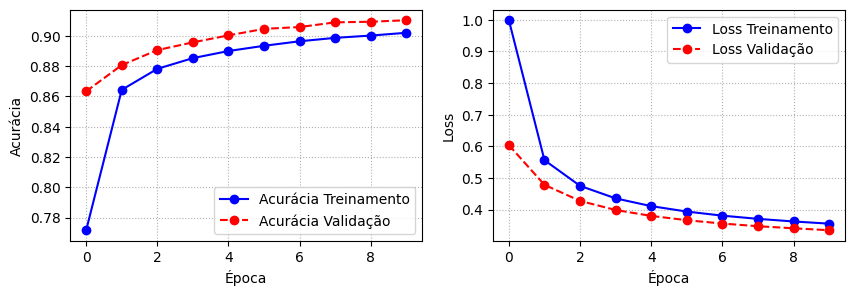

In [34]:
plot_resultados_modelo(history_m1)

In [35]:
modelo_2 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
      tf.keras.layers.Dense(200, activation='sigmoid'),
      tf.keras.layers.Dense(60, activation='sigmoid'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
history_m2 = modelo_2.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test), batch_size=64,
                          verbose=2)

Epoch 1/10
938/938 - 1s - 947us/step - accuracy: 0.2772 - loss: 2.2472 - val_accuracy: 0.4623 - val_loss: 2.1682
Epoch 2/10
938/938 - 1s - 732us/step - accuracy: 0.5506 - loss: 2.0646 - val_accuracy: 0.5973 - val_loss: 1.9219
Epoch 3/10
938/938 - 1s - 772us/step - accuracy: 0.6390 - loss: 1.7441 - val_accuracy: 0.6942 - val_loss: 1.5277
Epoch 4/10
938/938 - 1s - 746us/step - accuracy: 0.7084 - loss: 1.3549 - val_accuracy: 0.7423 - val_loss: 1.1687
Epoch 5/10
938/938 - 1s - 790us/step - accuracy: 0.7634 - loss: 1.0618 - val_accuracy: 0.7944 - val_loss: 0.9371
Epoch 6/10
938/938 - 1s - 716us/step - accuracy: 0.7998 - loss: 0.8772 - val_accuracy: 0.8115 - val_loss: 0.7910
Epoch 7/10
938/938 - 1s - 734us/step - accuracy: 0.8218 - loss: 0.7554 - val_accuracy: 0.8319 - val_loss: 0.6908
Epoch 8/10
938/938 - 1s - 744us/step - accuracy: 0.8384 - loss: 0.6694 - val_accuracy: 0.8480 - val_loss: 0.6179
Epoch 9/10
938/938 - 1s - 725us/step - accuracy: 0.8500 - loss: 0.6060 - val_accuracy: 0.8603 - 

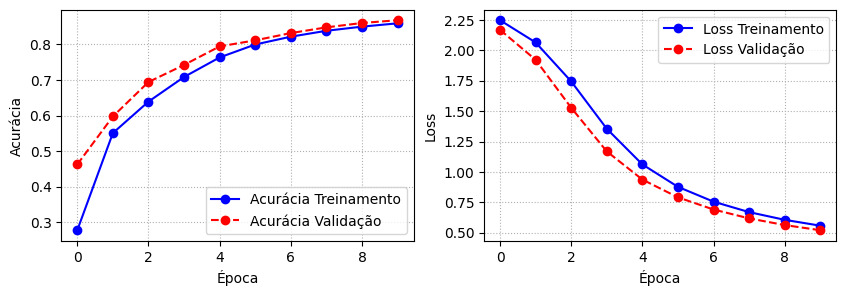

In [37]:
plot_resultados_modelo(history_m2)

In [38]:
modelo_3 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(28, 28, 1,)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [39]:
history_m3 = modelo_3.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64, verbose=2)

Epoch 1/10
938/938 - 1s - 1ms/step - accuracy: 0.9272 - loss: 0.2536 - val_accuracy: 0.9641 - val_loss: 0.1212
Epoch 2/10
938/938 - 1s - 1ms/step - accuracy: 0.9704 - loss: 0.0994 - val_accuracy: 0.9719 - val_loss: 0.0874
Epoch 3/10
938/938 - 1s - 1ms/step - accuracy: 0.9793 - loss: 0.0681 - val_accuracy: 0.9773 - val_loss: 0.0726
Epoch 4/10
938/938 - 1s - 1ms/step - accuracy: 0.9853 - loss: 0.0483 - val_accuracy: 0.9785 - val_loss: 0.0681
Epoch 5/10
938/938 - 1s - 1ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9788 - val_loss: 0.0685
Epoch 6/10
938/938 - 1s - 1ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9822 - val_loss: 0.0633
Epoch 7/10
938/938 - 1s - 1ms/step - accuracy: 0.9922 - loss: 0.0235 - val_accuracy: 0.9791 - val_loss: 0.0764
Epoch 8/10
938/938 - 1s - 1ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9782 - val_loss: 0.0767
Epoch 9/10
938/938 - 1s - 1ms/step - accuracy: 0.9944 - loss: 0.0167 - val_accuracy: 0.9809 - val_loss: 0.0732
E

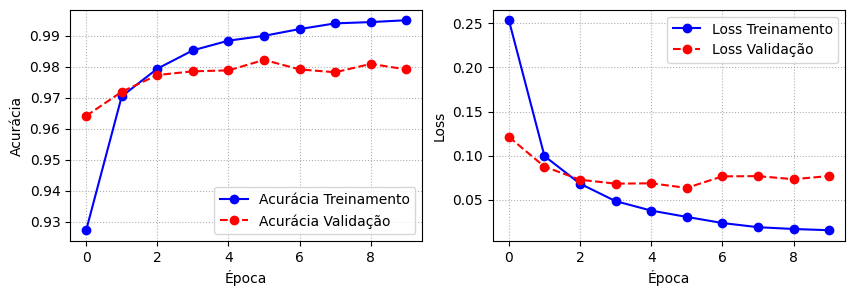

In [40]:
plot_resultados_modelo(history_m3)

In [41]:
import math
modelo_4 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [42]:
history_m4 = modelo_4.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 8s - 9ms/step - accuracy: 0.9465 - loss: 0.1695 - val_accuracy: 0.9637 - val_loss: 0.1108 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 8s - 8ms/step - accuracy: 0.9815 - loss: 0.0610 - val_accuracy: 0.9849 - val_loss: 0.0473 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 8s - 8ms/step - accuracy: 0.9887 - loss: 0.0345 - val_accuracy: 0.9851 - val_loss: 0.0473 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 8s - 8ms/step - accuracy: 0.9935 - loss: 0.0195 - val_accuracy: 0.9877 - val_loss: 0.0448 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 7s - 8ms/step - accuracy: 0.9962 - loss: 0.0112 - val_accuracy: 0.9892 

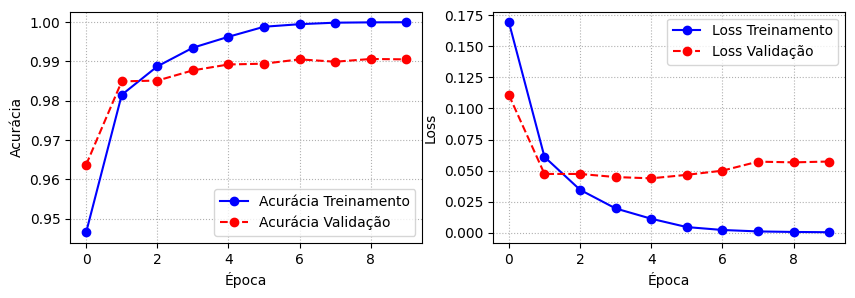

In [43]:
plot_resultados_modelo(history_m4)

In [44]:
modelo_5 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28,28,1)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [45]:
history_m5 = modelo_5.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 8s - 9ms/step - accuracy: 0.9346 - loss: 0.2148 - val_accuracy: 0.9769 - val_loss: 0.0807 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 7s - 8ms/step - accuracy: 0.9748 - loss: 0.0873 - val_accuracy: 0.9807 - val_loss: 0.0633 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 8s - 8ms/step - accuracy: 0.9818 - loss: 0.0604 - val_accuracy: 0.9864 - val_loss: 0.0464 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 8s - 8ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9843 - val_loss: 0.0519 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 8s - 8ms/step - accuracy: 0.9904 - loss: 0.0301 - val_accuracy: 0.9881 

In [46]:
modelo_6 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(28, 28, 1)),

      tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(200, use_bias=False),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [47]:
history_m6 = modelo_6.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
938/938 - 14s - 14ms/step - accuracy: 0.9641 - loss: 0.1186 - val_accuracy: 0.9812 - val_loss: 0.0618 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
938/938 - 14s - 15ms/step - accuracy: 0.9858 - loss: 0.0461 - val_accuracy: 0.9707 - val_loss: 0.0968 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
938/938 - 13s - 14ms/step - accuracy: 0.9910 - loss: 0.0285 - val_accuracy: 0.9880 - val_loss: 0.0352 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
938/938 - 13s - 14ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9911 - val_loss: 0.0273 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
938/938 - 13s - 14ms/step - accuracy: 0.9958 - loss: 0.0119 - val_accurac

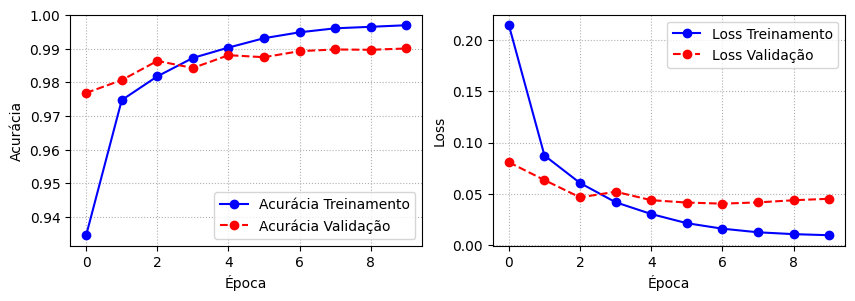

In [48]:
plot_resultados_modelo(history_m5)

# CIFAR

Repita as tarefas desse laboratório para o dataset Cifar10, o qual é um conjunto de dados amplamente utilizado em tarefas de aprendizado de máquina, especialmente em visão computacional. Ele contém 60.000 imagens coloridas, com tamanho de 32x32 pixels distribuídas em 10 classes diferentes, totalizando 6.000 imagens por classe. As classes incluem categorias comuns, como aviões, automóveis, pássaros, gatos, cervos, cachorros, sapos, cavalos, navios e caminhões.
O dataset é dividido em 50.000 imagens para treinamento e 10.000 imagens para teste, sendo frequentemente utilizado como benchmark para avaliar o desempenho de algoritmos de classificação de imagens. Cada imagem é rotulada com apenas uma classe, o que torna o CIFAR-10 um problema de classificação supervisionada.



In [50]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context # este import foi necessário por causa de um erro de SSL

In [51]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 182s 1us/step


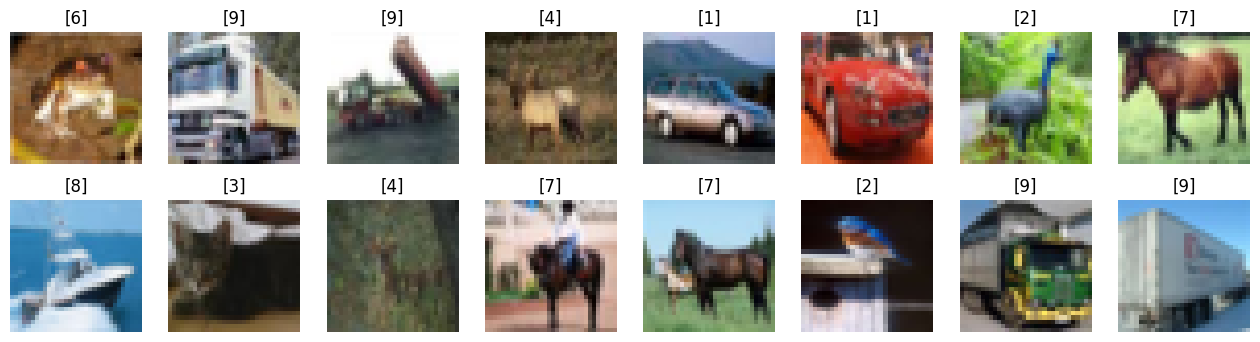

In [52]:
linhas  = 2
colunas = 8

fig, axs = plt.subplots(linhas, colunas, figsize=(16, 4))
axs      = axs.flatten()

for i in range(linhas * colunas):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].set_title(str(y_train[i]))
    axs[i].axis('off')

plt.show()

In [ ]:
# Pré-processando
x_train, x_test = x_train / 1024.0, x_test / 1024.0

In [55]:
# Calcular mean e std para cada canal (RGB)
mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

print(f"Mean: {mean}")   # Aproximadamente [125.3, 123.0, 113.9]
print(f"Std: {std}")     # Aproximadamente [63.0, 62.1, 66.7]

Mean: [0.12237004 0.12006874 0.11119666]
Std: [0.06151682 0.0606335  0.0651415 ]


In [56]:
# Normalização por canal
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [58]:
modelo_1 = tf.keras.models.Sequential()
modelo_1.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
modelo_1.add(tf.keras.layers.Dense(10, activation='softmax'))

/Users/daniel-higa/development/github/mo839/lab02/mo839/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
modelo_1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
def plot_resultados_modelo(history):
  fig, ax = plt.subplots(1, 2, figsize=(10, 3))
  ax      = ax.flatten()

  ax[0].plot(history.history['accuracy'], label='Acurácia Treinamento', marker='o', color='blue')
  ax[0].plot(history.history['val_accuracy'], label='Acurácia Validação', marker='o', color='red', linestyle='--')

  ax[1].plot(history.history['loss'], label='Loss Treinamento', marker='o', color='blue')
  ax[1].plot(history.history['val_loss'], label='Loss Validação', marker='o', color='red', linestyle='--')

  for _ in range(2):
      ax[_].set_xlabel('Época')
      ax[_].set_ylabel('Acurácia' if _ == 0 else 'Loss')
      ax[_].legend()
      ax[_].grid(True, linestyle=':')

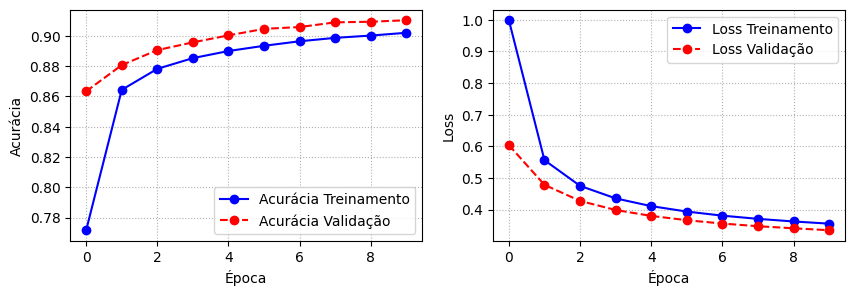

In [61]:
plot_resultados_modelo(history_m1)


In [64]:
modelo_2 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(32, 32, 3,)),
      tf.keras.layers.Dense(200, activation='sigmoid'),
      tf.keras.layers.Dense(60, activation='sigmoid'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/Users/daniel-higa/development/github/mo839/lab02/mo839/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
history_m2 = modelo_2.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test), batch_size=64,
                          verbose=2)

Epoch 1/10


/Users/daniel-higa/development/github/mo839/lab02/mo839/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 - 1s - 2ms/step - accuracy: 0.2456 - loss: 2.1404 - val_accuracy: 0.2964 - val_loss: 2.0403
Epoch 2/10
782/782 - 1s - 1ms/step - accuracy: 0.3139 - loss: 1.9881 - val_accuracy: 0.3333 - val_loss: 1.9396
Epoch 3/10
782/782 - 1s - 2ms/step - accuracy: 0.3414 - loss: 1.9094 - val_accuracy: 0.3536 - val_loss: 1.8795
Epoch 4/10
782/782 - 1s - 1ms/step - accuracy: 0.3573 - loss: 1.8588 - val_accuracy: 0.3634 - val_loss: 1.8378
Epoch 5/10
782/782 - 1s - 1ms/step - accuracy: 0.3675 - loss: 1.8220 - val_accuracy: 0.3722 - val_loss: 1.8071
Epoch 6/10
782/782 - 1s - 1ms/step - accuracy: 0.3770 - loss: 1.7928 - val_accuracy: 0.3798 - val_loss: 1.7823
Epoch 7/10
782/782 - 1s - 1ms/step - accuracy: 0.3845 - loss: 1.7698 - val_accuracy: 0.3898 - val_loss: 1.7603
Epoch 8/10
782/782 - 1s - 1ms/step - accuracy: 0.3913 - loss: 1.7498 - val_accuracy: 0.3918 - val_loss: 1.7427
Epoch 9/10
782/782 - 1s - 1ms/step - accuracy: 0.3970 - loss: 1.7328 - val_accuracy: 0.3966 - val_loss: 1.7276
Epoch 10/10


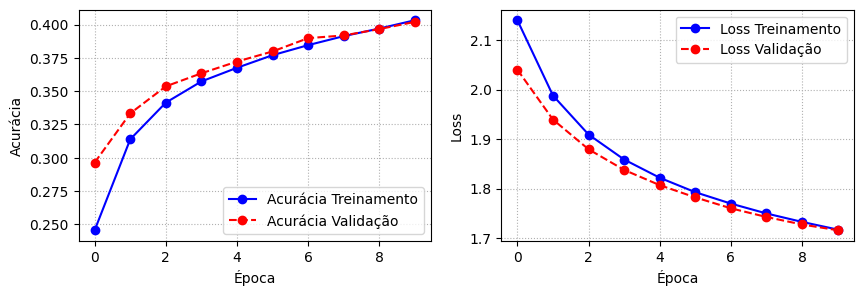

In [66]:
plot_resultados_modelo(history_m2)

In [67]:
modelo_3 = tf.keras.Sequential(
  [
      tf.keras.layers.Flatten(input_shape=(32, 32, 3,)),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

modelo_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
history_m3 = modelo_3.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          batch_size=64, verbose=2)

Epoch 1/10
782/782 - 2s - 3ms/step - accuracy: 0.3798 - loss: 1.7799 - val_accuracy: 0.4285 - val_loss: 1.6120
Epoch 2/10
782/782 - 2s - 3ms/step - accuracy: 0.4597 - loss: 1.5299 - val_accuracy: 0.4623 - val_loss: 1.5109
Epoch 3/10
782/782 - 2s - 3ms/step - accuracy: 0.4976 - loss: 1.4260 - val_accuracy: 0.4799 - val_loss: 1.4713
Epoch 4/10
782/782 - 2s - 2ms/step - accuracy: 0.5219 - loss: 1.3518 - val_accuracy: 0.4905 - val_loss: 1.4582
Epoch 5/10
782/782 - 2s - 2ms/step - accuracy: 0.5429 - loss: 1.2945 - val_accuracy: 0.4903 - val_loss: 1.4351
Epoch 6/10
782/782 - 2s - 2ms/step - accuracy: 0.5602 - loss: 1.2405 - val_accuracy: 0.5083 - val_loss: 1.4185
Epoch 7/10
782/782 - 2s - 2ms/step - accuracy: 0.5802 - loss: 1.1949 - val_accuracy: 0.5045 - val_loss: 1.4257
Epoch 8/10
782/782 - 2s - 2ms/step - accuracy: 0.5929 - loss: 1.1500 - val_accuracy: 0.5127 - val_loss: 1.4332
Epoch 9/10
782/782 - 2s - 2ms/step - accuracy: 0.6060 - loss: 1.1071 - val_accuracy: 0.5153 - val_loss: 1.4143
E

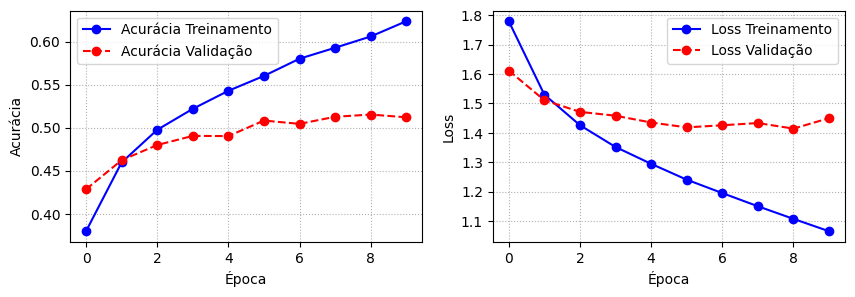

In [69]:
plot_resultados_modelo(history_m3)

In [72]:
import math
modelo_4 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(32,32,3)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [73]:
history_m4 = modelo_4.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
782/782 - 9s - 12ms/step - accuracy: 0.3804 - loss: 1.7155 - val_accuracy: 0.4149 - val_loss: 1.6489 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
782/782 - 8s - 11ms/step - accuracy: 0.4686 - loss: 1.4690 - val_accuracy: 0.4677 - val_loss: 1.4945 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
782/782 - 8s - 11ms/step - accuracy: 0.5209 - loss: 1.3274 - val_accuracy: 0.4800 - val_loss: 1.4409 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
782/782 - 9s - 11ms/step - accuracy: 0.5705 - loss: 1.1916 - val_accuracy: 0.5141 - val_loss: 1.3732 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
782/782 - 8s - 11ms/step - accuracy: 0.6190 - loss: 1.0576 - val_accuracy: 0.

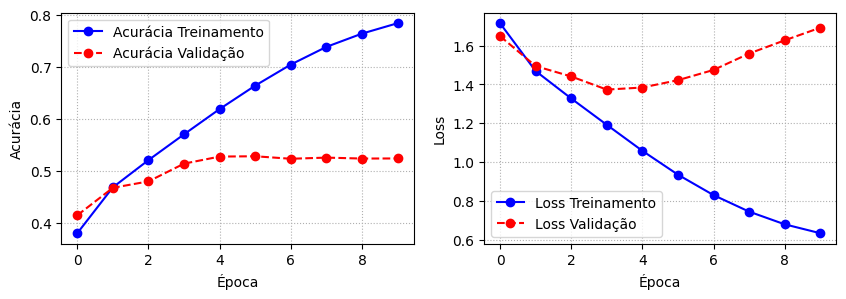

In [74]:
plot_resultados_modelo(history_m4)

In [76]:
modelo_5 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(32,32,3)),
      tf.keras.layers.Conv2D(kernel_size=3, filters=12, activation='relu', padding='same'),
      tf.keras.layers.Conv2D(kernel_size=6, filters=24, activation='relu', padding='same', strides=2),
      tf.keras.layers.Conv2D(kernel_size=6, filters=32, activation='relu', padding='same', strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(200, activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [77]:
history_m5 = modelo_5.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
782/782 - 9s - 12ms/step - accuracy: 0.1996 - loss: 2.1202 - val_accuracy: 0.2684 - val_loss: 1.9249 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
782/782 - 8s - 11ms/step - accuracy: 0.3081 - loss: 1.8473 - val_accuracy: 0.3690 - val_loss: 1.6867 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
782/782 - 9s - 11ms/step - accuracy: 0.3656 - loss: 1.7031 - val_accuracy: 0.4133 - val_loss: 1.5875 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
782/782 - 9s - 11ms/step - accuracy: 0.4051 - loss: 1.6030 - val_accuracy: 0.4299 - val_loss: 1.5450 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
782/782 - 9s - 11ms/step - accuracy: 0.4355 - loss: 1.5268 - val_accuracy: 0.

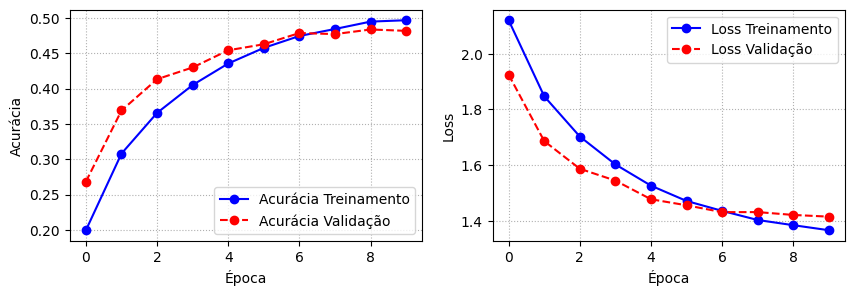

In [78]:
plot_resultados_modelo(history_m5)

In [79]:
modelo_6 = tf.keras.Sequential(
  [
      tf.keras.layers.Input(shape=(32, 32, 3)),

      tf.keras.layers.Conv2D(kernel_size=3, filters=12, use_bias=False, padding='same'),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=24, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Conv2D(kernel_size=6, filters=32, use_bias=False, padding='same', strides=2),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Flatten(),

      tf.keras.layers.Dense(200, use_bias=False),
      tf.keras.layers.BatchNormalization(center=True, scale=False),
      tf.keras.layers.Activation('relu'),

      tf.keras.layers.Dropout(0.3),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

# lr decay function
def lr_decay(epoch):
  return 0.01 * math.pow(0.666, epoch)

lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=True)

modelo_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [80]:
history_m6 = modelo_6.fit(x_train, y_train, epochs=10,
                          validation_data=(x_test, y_test),
                          callbacks=[lr_decay_callback],
                          batch_size=64, verbose=2)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
782/782 - 13s - 16ms/step - accuracy: 0.4836 - loss: 1.4416 - val_accuracy: 0.5689 - val_loss: 1.2013 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00666.
Epoch 2/10
782/782 - 12s - 16ms/step - accuracy: 0.6404 - loss: 1.0140 - val_accuracy: 0.6715 - val_loss: 0.9398 - learning_rate: 0.0067

Epoch 3: LearningRateScheduler setting learning rate to 0.004435560000000001.
Epoch 3/10
782/782 - 12s - 15ms/step - accuracy: 0.7143 - loss: 0.8076 - val_accuracy: 0.7006 - val_loss: 0.8537 - learning_rate: 0.0044

Epoch 4: LearningRateScheduler setting learning rate to 0.0029540829600000007.
Epoch 4/10
782/782 - 13s - 16ms/step - accuracy: 0.7682 - loss: 0.6580 - val_accuracy: 0.7309 - val_loss: 0.7883 - learning_rate: 0.0030

Epoch 5: LearningRateScheduler setting learning rate to 0.0019674192513600007.
Epoch 5/10
782/782 - 14s - 17ms/step - accuracy: 0.8108 - loss: 0.5375 - val_accurac

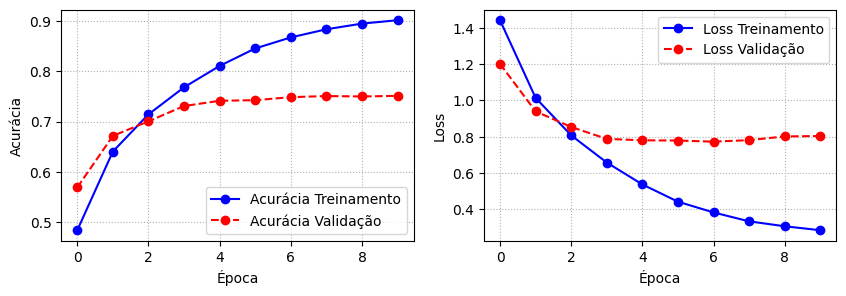

In [81]:
plot_resultados_modelo(history_m6)

In [94]:
lista_modelos = [modelo_1, modelo_2, modelo_3, modelo_4, modelo_5, modelo_6]

In [95]:
import numpy as np

lista_results = []

for modelo in lista_modelos:
  results  = modelo.predict(x_test)
  results  = np.argmax(results, axis=1)

  lista_results.append(results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [96]:
import sklearn
from sklearn.metrics import confusion_matrix

lista_cms = []

for resultado in lista_results:
  cm = confusion_matrix(
          y_test, resultado, labels=np.arange(10),
      )
  lista_cms.append(cm)

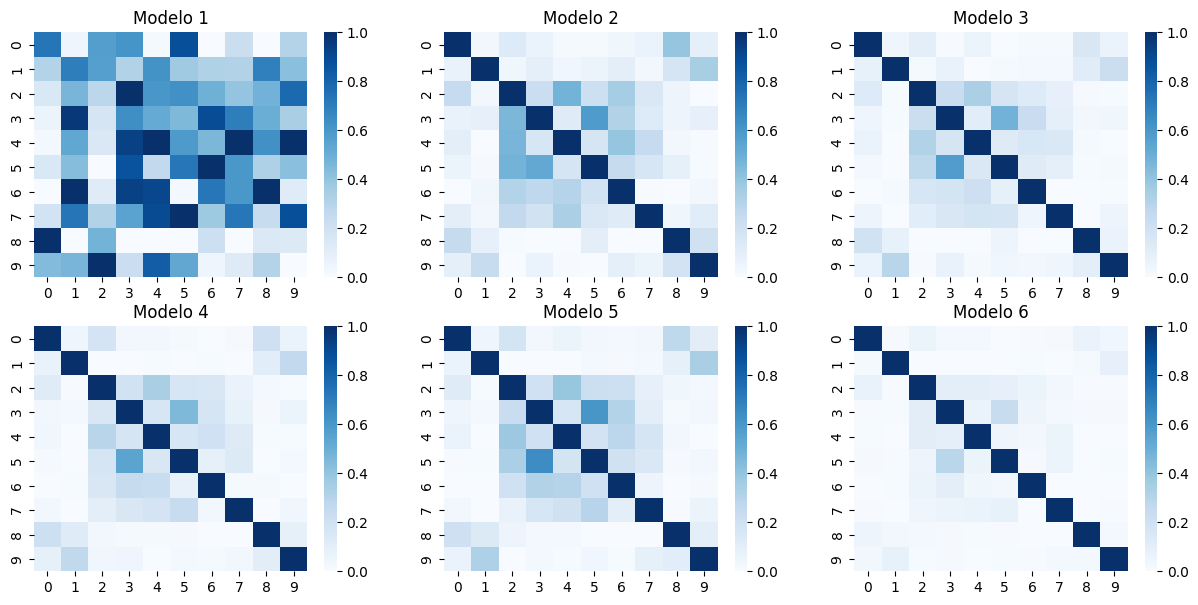

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax = ax.flatten()

for i in range(6):
  cm_norm = sklearn.preprocessing.MinMaxScaler().fit_transform(lista_cms[i])
  sns.heatmap(cm_norm, cmap='Blues', ax=ax[i]);
  ax[i].set_title(f'Modelo {i + 1}')

In [99]:
lista_results

[array([6, 0, 0, ..., 6, 8, 2], shape=(10000,)),
 array([3, 8, 8, ..., 5, 6, 7], shape=(10000,)),
 array([3, 8, 0, ..., 2, 5, 7], shape=(10000,)),
 array([3, 1, 8, ..., 5, 7, 7], shape=(10000,)),
 array([3, 1, 8, ..., 5, 7, 7], shape=(10000,)),
 array([3, 8, 8, ..., 5, 0, 7], shape=(10000,))]

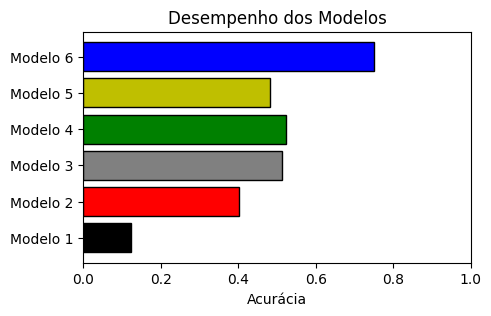

In [102]:
from sklearn.metrics import accuracy_score

lista_accs = []

fig, ax = plt.subplots(figsize=(5, 3))

for resultado in lista_results:
  acc = accuracy_score(resultado, y_test)
  lista_accs.append(acc)

ax.barh(range(6), width=lista_accs, color=['k', 'r', 'gray', 'g', 'y', 'b'], ec='k')
ax.set_yticks([0, 1, 2, 3, 4, 5], ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6']);
ax.set_xlim(0, 1)
ax.set_xlabel('Acurácia')
ax.set_title('Desempenho dos Modelos');

In [104]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import keras_tuner
from keras_tuner import RandomSearch

In [106]:
# Função para criar o modelo
def constroi_modelo(hp):
    model = keras.Sequential()
    # Camada vetorização
    model.add(layers.Flatten(input_shape=(32, 32, 3)))

    # laço para definir quantidade de camadas
    for i in range(hp.Int('num_layers', 2, 3)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', 32, 64, 128), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.1, 0.5, 0.05)))

    model.add(layers.Dense(units=10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

    return model

In [107]:
# Define o objeto RandomSearch
tuner = RandomSearch(
    constroi_modelo,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=1,
    directory='mnist',
    )

# Executa a pesquisa em grade
tuner.search(
    x_train,
    y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[tf.keras.callbacks.TensorBoard("mnist2", histogram_freq=1)])

Trial 15 Complete [00h 00m 04s]
val_accuracy: 0.3984000086784363

Best val_accuracy So Far: 0.4474000036716461
Total elapsed time: 00h 00m 59s


In [108]:
%reload_ext tensorboard

In [110]:
%tensorboard --logdir=cifar10

Reusing TensorBoard on port 6006 (pid 1563), started 0:00:13 ago. (Use '!kill 1563' to kill it.)